In [15]:
import time
import torch
import numpy as np
import networkx as nx
import collections
import matplotlib.pyplot as plt
from data.gene_graphs import GeneManiaGraph, RegNetGraph
from scipy import sparse
import joblib 
import sklearn.cluster
import scipy.cluster
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import ward, fcluster, dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


In [14]:
## All the edge weights are really small. They are actually confidence intervals. Also, it's a sparse graph

In [16]:
def bucket_weights(adj, bins):
    labels = ["".join(str(labels[0]) + "-" + str(round(labels[1], 1))) for labels in zip(bins, bins + 0.1)]
    labels[0] = "(" + labels[0]

    results = []
    nodes = {}
    for x in bins:
        subgraph = ((adj > x) & (adj <= x + 0.1))  
        results.append(subgraph.sum())
        nodes[x] = subgraph
    return results, labels, nodes

In [17]:
gene_graph = GeneManiaGraph()
genemania_adj = np.asarray(nx.to_numpy_matrix(gene_graph.nx_graph))

Torrent name: genemania.pkl, Size: 9.61MB
Checking for pieces on disk: |██████████████████████████████████████████████████| 100.0% 
Found 294 finished pieces out of 294 total pieces.
Found dataset at /home/martin/.academictorrents-datastore/genemania.pkl


In [18]:
bins = np.array([round(x, 1) for x in np.arange(0., 1., 0.1)])
genemania_results, genemania_labels, nodes = bucket_weights(genemania_adj, bins)

In [19]:
len(genemania_labels)

10

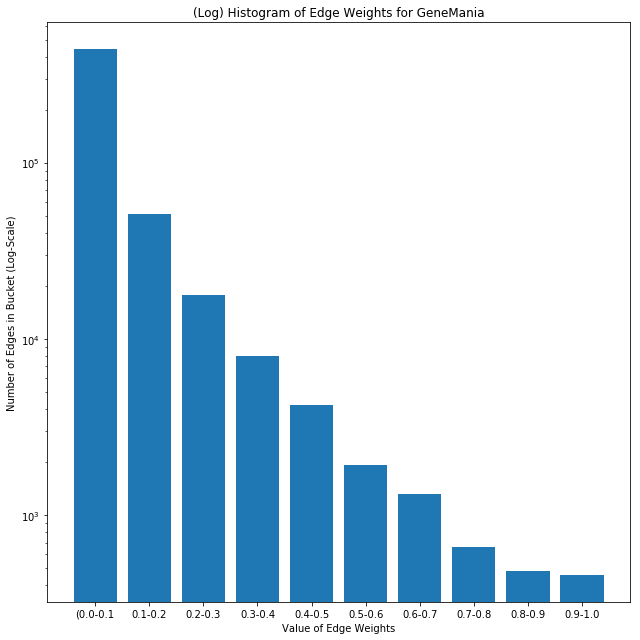

In [20]:
plt.figure(figsize=(9, 9))

plt.bar(x=genemania_labels, height=genemania_results, log=1)
plt.title("(Log) Histogram of Edge Weights for GeneMania")
plt.xlabel("Value of Edge Weights")
plt.ylabel("Number of Edges in Bucket (Log-Scale)")
plt.xlim=1.0

plt.tight_layout()
plt.show()

In [21]:
def bucket_weights_regnet(adj, bins):
    labels = ["".join(str(labels[0]) + "-" + str(round(labels[1], 3))) for labels in zip(bins, bins + 0.005)]
    labels[0] = "(" + labels[0]

    results = []
    nodes = {}
    for x in bins:
        subgraph = ((adj > x) & (adj <= x + 0.1))  
        results.append(subgraph.sum())
        nodes[x] = subgraph
    return results, labels, nodes

In [26]:
regnet = RegNetGraph()
regnet_adj = np.asarray(nx.to_numpy_matrix(regnet.nx_graph))

Torrent name: regnet.pkl, Size: 8.81MB
Checking for pieces on disk: |██████████████████████████████████████████████████| 100.0% 
Found 269 finished pieces out of 269 total pieces.
Found dataset at /home/martin/.academictorrents-datastore/regnet.pkl


In [27]:
bins = np.array([round(x, 3) for x in np.arange(0., .056, 0.005)])
regnet_results, regnet_labels, nodes = bucket_weights_regnet(regnet_adj, bins)

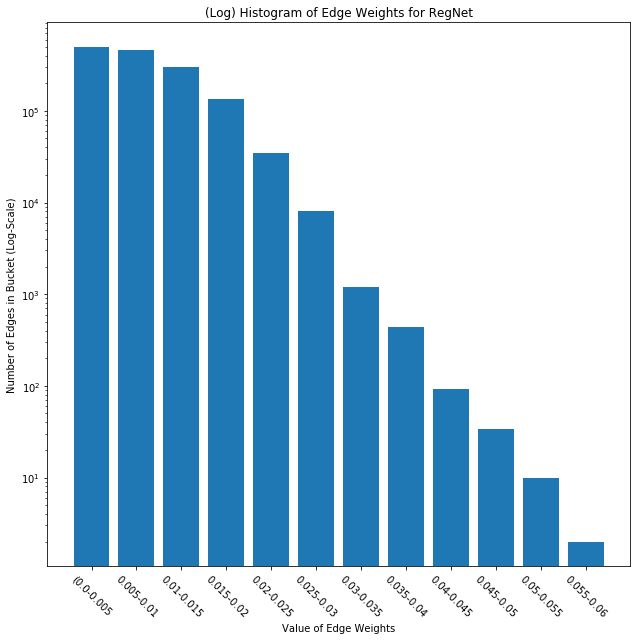

In [28]:
plt.figure(figsize=(9, 9))

plt.bar(x=regnet_labels, height=regnet_results, log=1)
plt.title("(Log) Histogram of Edge Weights for RegNet")
plt.xlabel("Value of Edge Weights")
plt.ylabel("Number of Edges in Bucket (Log-Scale)")
plt.xlim=1.0
plt.xticks(rotation=-45)

plt.tight_layout()
plt.show()